In [1]:
# Import necessary libraries for machine learning and model evaluation
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import matplotlib.pyplot as plt
from sklearn import preprocessing
from scipy.spatial import distance
import warnings
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy import stats  
from statsmodels.discrete.discrete_model import Logit
from statsmodels.tools import add_constant
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import itertools
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.model_selection import cross_val_score
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
#Loading Dataset
df=pd.read_csv("spotify-dataset.csv")
#print top 5 records - Optional
df.head()

Unnamed: 0                track_id                 artists  \
0           0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1           1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2           2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3           3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4           4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To Begin Again          57       210826     False   
3  Can't Help Falling In Love          71       201933     False   
4                     Hold On          82       198853     False   

   danceability  energy  ...  loudness  mode  speechiness  acousticness  \
0         0.676  0.4610  ...    -6.746     0       0.1430        0.0322   
1         0.420  0.1660  ...   -17.235     1       0.0763        0.9240   
2         0.438  0.3590  ...    -9.734     1       0.0557        0.2100   
3         0.266  0.0596  ...   -18.515     1       0.0363        0.9050   
4         0.618  0.4430  ...    -9.681     1       0.0526        0.4690   

   instrumentalness  liveness  valence    tempo  time_signature  track_genre  
0          0.000001    0.3580    0.715   87.917               4     acoustic  
1          0.000006    0.1010    0.267   77.489               4     acoustic  
2          0.000000    0.1170    0.120   76.332               4     acoustic  
3          0.000071    0.1320    0.143  181.740               3     acoustic  
4          0.000000    0.0829    0.167  119.949               4     acoustic  

[5 rows x 21 columns]

In [3]:
#Counting the rows and coloumns - Optional
ncols, nrows = df.shape
print(f'Dataset has {ncols} rows and {nrows} columns')

Dataset has 114000 rows and 21 columns


In [4]:
# Checking for duplicate rows in the DataFrame
duplicated_rows = df.duplicated().sum()
# If there are no duplicate rows, print a message indicating all rows are unique
if duplicated_rows == 0:
    print('There are 0 rows that are duplicated, which means each row in the DataFrame is unique.')
else:
    print(f'There are {duplicated_rows} rows that are duplicated so we need to drop those {duplicated_rows} rows')
     # Drop the duplicate rows from the DataFrame
    df = df.drop_duplicates()
    # Print the number of rows left in the DataFrame after dropping duplicates
    print(f'After drop duplicated rows, there are {df.shape[0]} rows left')

There are 0 rows that are duplicated, which means each row in the DataFrame is unique.


#### Code Analysis: 
To ensure the integrity of the dataset by removing any duplicate rows. Duplicate rows can skew analysis and model training, leading to inaccurate results. By identifying and removing duplicates, the dataset is cleaned, which is a crucial step in the data preprocessing phase of a data analysis or machine learning project. 

In [5]:
# What are the different data type of each column
df.dtypes.to_frame('Data Type')

Data Type
Unnamed: 0           int64
track_id            object
artists             object
album_name          object
track_name          object
popularity           int64
duration_ms          int64
explicit              bool
danceability       float64
energy             float64
key                  int64
loudness           float64
mode                 int64
speechiness        float64
acousticness       float64
instrumentalness   float64
liveness           float64
valence            float64
tempo              float64
time_signature       int64
track_genre         object

This code check and prints the differnt data type in the data set.

In [6]:
# Missing values in each row
# Calculate the number of missing values in each row of the DataFrame
missing_values_per_row = df.isnull().sum(axis=1)

# Count how many rows have the same number of missing values and sort these counts by the number of missing values
count_per_missing_value = missing_values_per_row.value_counts().sort_index()

# Print the results in a readable format
# This loop iterates over each unique count of missing values and the number of rows that have that count
for missing, rows in count_per_missing_value.items():
    print(f'{rows} row(s) have {missing} missing values')
    
# Calculate the total number of rows that have at least one missing value
total_rows_with_missing_values = (df.isnull().any(axis=1)).sum()

# Print the total number of rows
print(f'Total number of rows with missing values: {total_rows_with_missing_values}')

113999 row(s) have 0 missing values
1 row(s) have 3 missing values
Total number of rows with missing values: 1


This code snippet is analyzing missing data within a dataset. It calculates and prints the number of missing values per row, counts how many rows have the same number of missing values, and finally, calculates the total number of rows that contain at least one missing value. This analysis is crucial for data cleaning and preprocessing steps in data analysis and machine learning projects, as handling missing data appropriately can significantly impact the performance of models.

###### The below code counts the numercial coloumns and describe it

In [7]:
#Count the numerical columns
# Select columns in the DataFrame that are of numerical type (either float64 or int64)
numerical_cols = df[df.columns[(df.dtypes == 'float64') | (df.dtypes == 'int64')]]

# Display the shape of the DataFrame containing only numerical columns
# This shows the number of rows and columns, where the number of columns indicates the count of numerical columns
numerical_cols.shape

#Describe the Numerical coloumns 
numerical_cols.describe()

Unnamed: 0     popularity   duration_ms   danceability  \
count  114000.000000  114000.000000  1.140000e+05  114000.000000   
mean    56999.500000      33.238535  2.280292e+05       0.566800   
std     32909.109681      22.305078  1.072977e+05       0.173542   
min         0.000000       0.000000  0.000000e+00       0.000000   
25%     28499.750000      17.000000  1.740660e+05       0.456000   
50%     56999.500000      35.000000  2.129060e+05       0.580000   
75%     85499.250000      50.000000  2.615060e+05       0.695000   
max    113999.000000     100.000000  5.237295e+06       0.985000   

              energy            key       loudness           mode  \
count  114000.000000  114000.000000  114000.000000  114000.000000   
mean        0.641383       5.309140      -8.258960       0.637553   
std         0.251529       3.559987       5.029337       0.480709   
min         0.000000       0.000000     -49.531000       0.000000   
25%         0.472000       2.000000     -10.013000       0.000000   
50%         0.685000       5.000000      -7.004000       1.000000   
75%         0.854000       8.000000      -5.003000       1.000000   
max         1.000000      11.000000       4.532000       1.000000   

         speechiness   acousticness  instrumentalness       liveness  \
count  114000.000000  114000.000000     114000.000000  114000.000000   
mean        0.084652       0.314910          0.156050       0.213553   
std         0.105732       0.332523          0.309555       0.190378   
min         0.000000       0.000000          0.000000       0.000000   
25%         0.035900       0.016900          0.000000       0.098000   
50%         0.048900       0.169000          0.000042       0.132000   
75%         0.084500       0.598000          0.049000       0.273000   
max         0.965000       0.996000          1.000000       1.000000   

             valence          tempo  time_signature  
count  114000.000000  114000.000000   114000.000000  
mean        0.474068     122.147837        3.904035  
std         0.259261      29.978197        0.432621  
min         0.000000       0.000000        0.000000  
25%         0.260000      99.218750        4.000000  
50%         0.464000     122.017000        4.000000  
75%         0.683000     140.071000        4.000000  
max         0.995000     243.372000        5.000000

It involves filtering the dataset to include only columns with numerical data types (float64 and int64), which are relevant for statistical analysis, machine learning models, and data visualization tasks. The code also provides a quick overview of the numerical data by displaying its shape, and detailed information about the columns. This process is crucial in the initial stages of data analysis and preprocessing, helping to understand the dataset's structure and prepare it for further analysis or modeling.

# EDA for pair ploting between numerical features of a track

/Users/siddhantdhyani/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


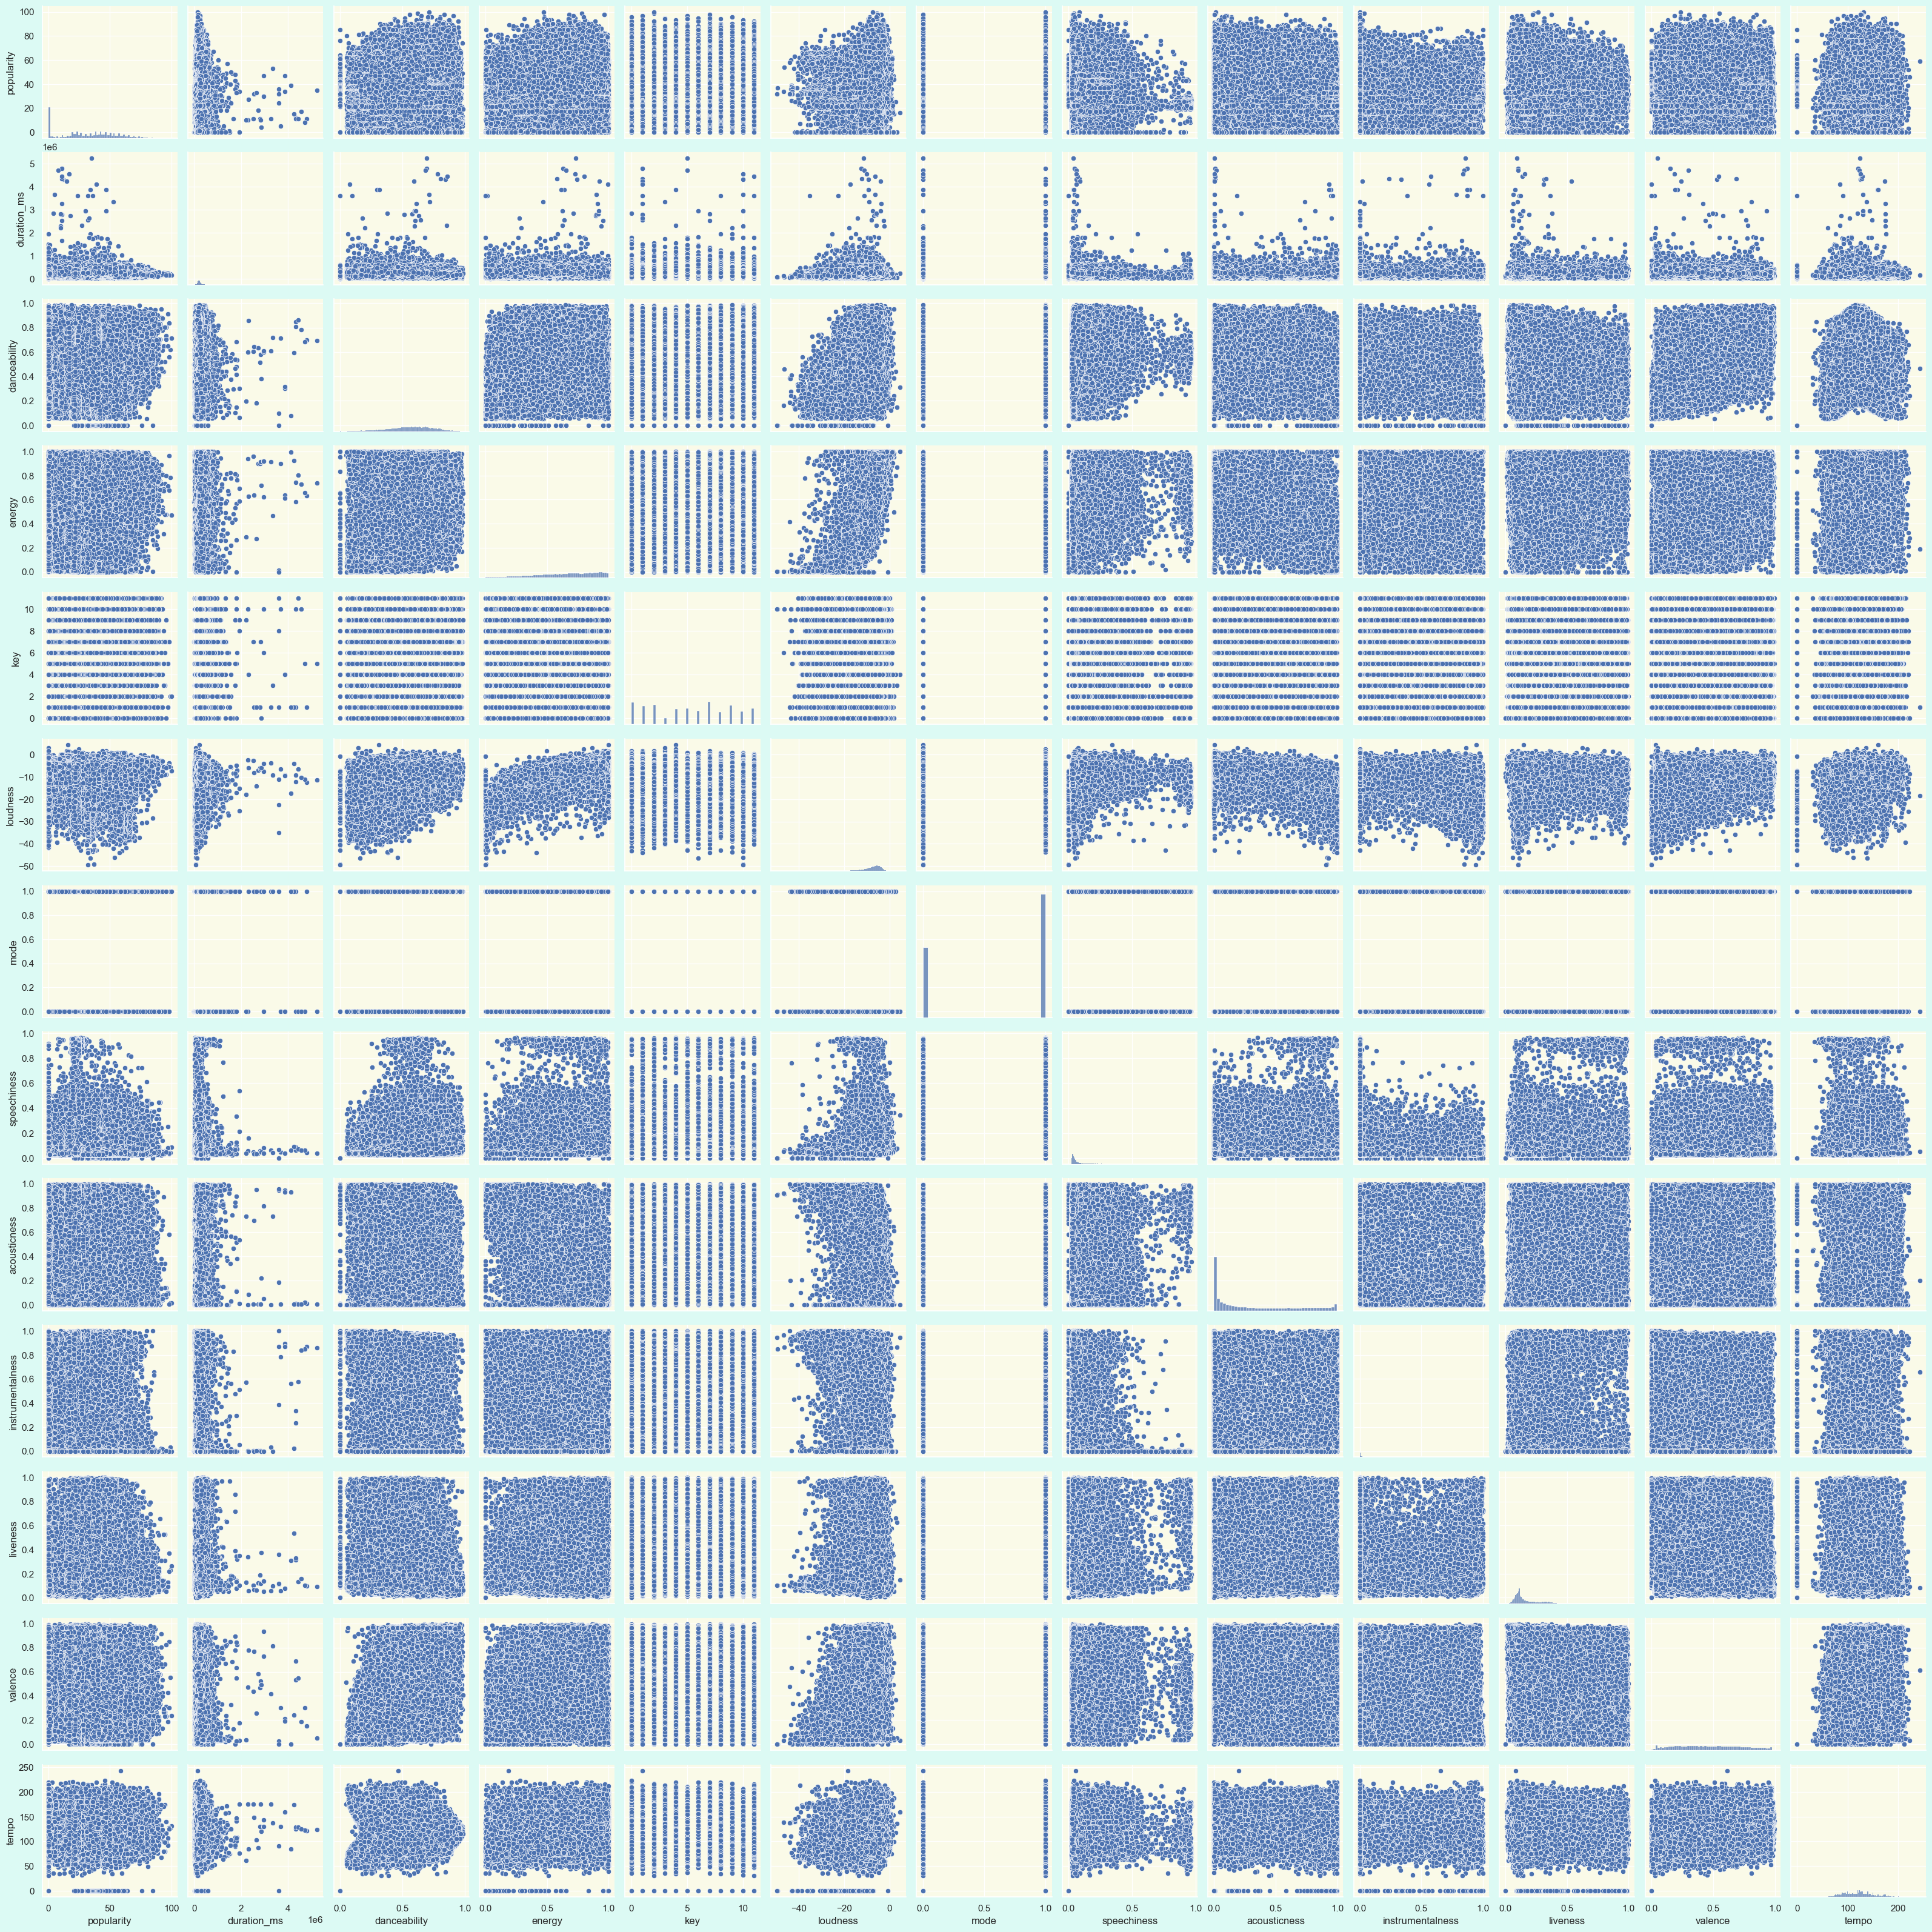

In [8]:
# Selecting the numerical features for the pair plot
numerical_features = ['popularity', 'duration_ms', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

# Customize the seaborn and matplotlib visual settings for the plots
sns.set(rc={"axes.facecolor":"#fafae8","figure.facecolor":"#dcfaf4"})

    
# Create a pair plot of the selected numerical features to visualize pairwise relationships in the dataset
sns.pairplot(df[numerical_features])

    
# Show the plot
plt.show()

This pair plot can help identify trends, correlations, and potential clusters within the data. It see both the distribution of single variables and the relationships between two variables

#### Insights from the pair plot:
The variable 'popularity' seems to have a skewed distribution with many tracks having lower popularity scores, while 'danceability', 'energy', 'valence', and 'tempo' appear to have more uniform distributions.

There seems to be a positive correlation between 'danceability' and 'valence', suggesting that tracks that are more danceable tend to be perceived as more positive. Similarly, 'energy' and 'loudness' also appear to be positively correlated, indicating that louder tracks are often more energetic

The 'speechiness' and 'instrumentalness' show clusters at the lower end, which might indicate that most tracks are either instrumental or contain lyrics, with few tracks having a balance of both.

##### Business Usecase for this EDA:
It uncover relationships between variables, supporting strategic decisions across different facets of the music industry.

Enables curators to create more nuanced playlists based on understanding how various musical features relate, improving user engagement on streaming platforms.

# EDA for corelation between numerical coloumns

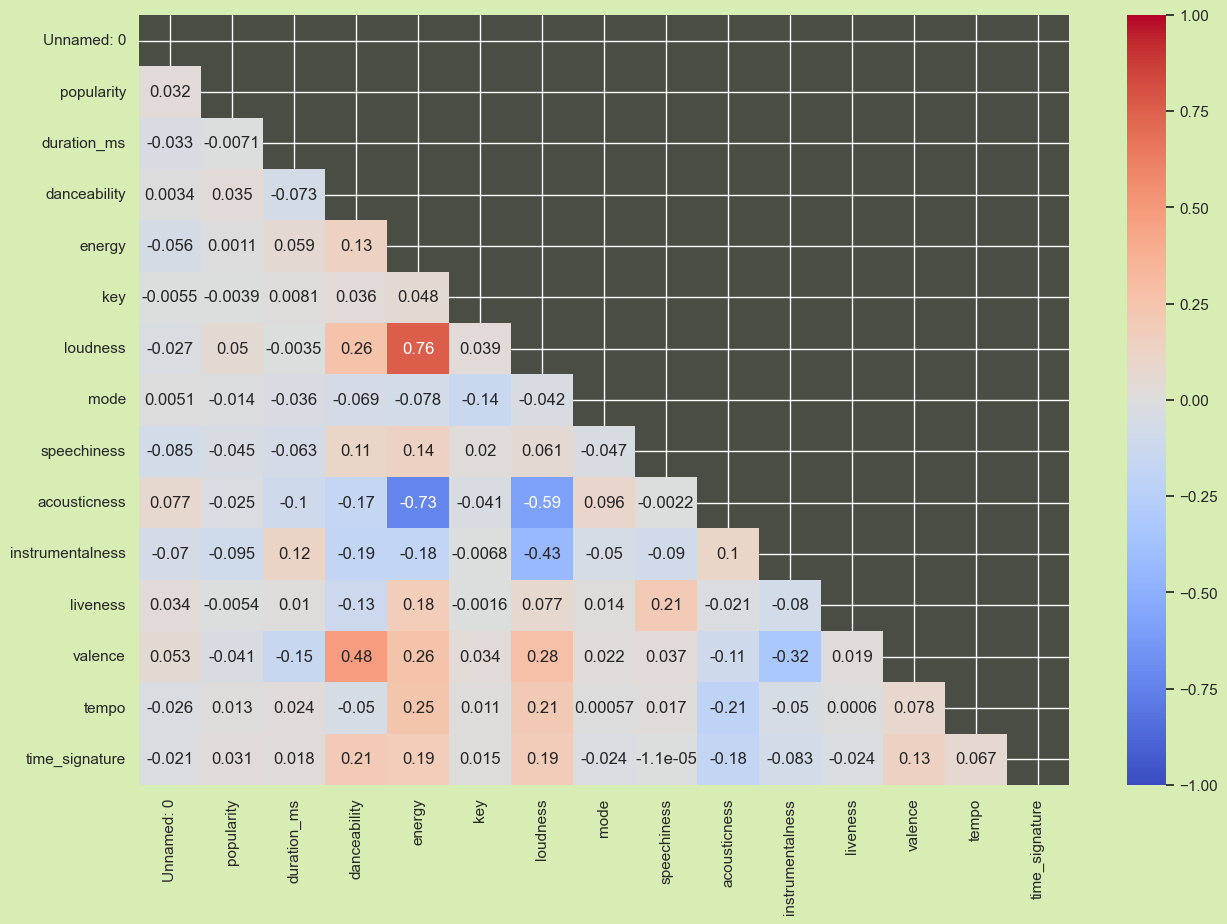

In [9]:
#heatmap for correlation
# Calculate the correlation matrix for numerical columns to understand the relationships between them
correralation = numerical_cols.corr()

# Initialize a mask to zero with the same shape as the correlation matrix
mask = np.zeros_like(correralation)

# Use the mask to cover the upper triangle of the correlation matrix, as it is mirrored across the diagonal
mask[np.triu_indices_from(mask)] = True

# Set the visual style of the plots to 'white' for a clean background
sns.set_style('white')

# Customize the seaborn and matplotlib visual settings for the plots
sns.set(rc={"axes.facecolor":"#494d43","figure.facecolor":"#d8edb4"})

# Create a figure with a specified size to ensure the heatmap is large enough to be readable
plt.figure(figsize=(15, 10))

# Plot the heatmap for the correlation matrix
# 'mask' is used to hide the upper triangle for better readability
# 'annot=True' displays the correlation coefficients in the heatmap cells
# 'vmin' and 'vmax' set the color scale limits for the heatmap
# 'cmap' defines the color palette used for indicating correlation values
sns.heatmap(correralation, mask=mask, annot=True, vmin=-1, vmax=1,cmap='coolwarm')

# Display the heatmap
plt.show()

#### Insights from the corelation heat map

The most significant correlations observed in the dataset are between energy and loudness (0.76), loudness and acousticness (-0.59), and energy and acousticness (-0.73). These findings align with the expected relationships where a song's energy negatively correlates with its acousticness, indicating that songs with higher energy tend to be less acoustic. Similarly, a direct correlation between a song's loudness and its energy suggests that louder songs are generally more energetic.

##### Business Usecase for this EDA:

Producers and artists can use insights from the correlation analysis to craft music that aligns with current trends or desired characteristics. For example, if danceability and energy are highly correlated, artists aiming for dance tracks might focus on increasing both attributes.

Marketing teams can use correlation insights to target their campaigns more effectively. If certain features correlate with track popularity, these can be emphasized in promotions to attract listeners' interest.

In [10]:
# Extract all categorical columns and store them in the variable categorical_cols
# The code filters columns based on their data type, specifically 'object' (which represents strings) and 'bool' (which represents boolean values)
categorical_cols = df[df.columns[(df.dtypes == 'object') | (df.dtypes == 'bool')]]
# Display the shape of the DataFrame containing only categorical columns
# This shows the number of rows and columns, where the number of columns indicates the count of categorical columns
categorical_cols.shape
# Display information about the categorical columns DataFrame
# This includes the index dtype and column dtypes, non-null values, and memory usage
# It's helpful for understanding the data types of the categorical columns and identifying any missing values
categorical_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   track_id     114000 non-null  object
 1   artists      113999 non-null  object
 2   album_name   113999 non-null  object
 3   track_name   113999 non-null  object
 4   explicit     114000 non-null  bool  
 5   track_genre  114000 non-null  object
dtypes: bool(1), object(5)
memory usage: 4.5+ MB


#### Code Analysis
Identify and work with categorical data within a dataset. Categorical data are variables that contain label values rather than numeric values. The number of possible values is often limited to a fixed set, which is why they are categorized as 'object' or 'bool' in pandas DataFrames. 

In [11]:
# Calculate the number of missing values for each categorical column
# Calculate the percentage of missing values for each categorical column
dist_categorical_cols = pd.DataFrame(
    data = {
        'Missing Values': categorical_cols.isnull().sum(),
        'Missing Percentage': (categorical_cols.isnull().mean() * 100)
    }
)
# Display the DataFrame containing the missing values count and percentage for each categorical column
dist_categorical_cols

Missing Values  Missing Percentage
track_id                  0            0.000000
artists                   1            0.000877
album_name                1            0.000877
track_name                1            0.000877
explicit                  0            0.000000
track_genre               0            0.000000

#### Code Analysis:
The purpose of this code is to provide a clear understanding of the completeness of the categorical data within a dataset. Knowing the number and percentage of missing values is crucial for data cleaning and preprocessing, as it helps to decide whether to fill in missing values, drop them, or consider other methods like imputation.

In [12]:
#examine the rows with missing values to consider how to handle them
categorical_cols[categorical_cols.isnull().any(axis=1)]

track_id artists album_name track_name  explicit  \
65900  1kR4gIb7nGxHPI3D2ifs59     NaN        NaN        NaN     False   

      track_genre  
65900       k-pop

In [13]:
# Identify the indices of rows with missing values in any of the categorical columns
index_to_drop = df[categorical_cols.isnull().any(axis=1)].index
# Drop the rows with missing values from the DataFrame in place, meaning the changes will affect the original DataFrame 
df.drop(index_to_drop, inplace=True)

# Print a message to the console indicating that rows with missing values have been dropped, along with the updated shape of data frame
print(f'Rows with missing values dropped. Updated DataFrame shape: {df.shape}')

Rows with missing values dropped. Updated DataFrame shape: (113999, 21)


In [14]:
df.describe(include=['object', 'bool'])

track_id      artists                  album_name  \
count                   113999       113999                      113999   
unique                   89740        31437                       46589   
top     6S3JlDAGk3uu3NtZbPnuhS  The Beatles  Alternative Christmas 2022   
freq                         9          279                         195   

             track_name explicit track_genre  
count            113999   113999      113999  
unique            73608        2         114  
top     Run Rudolph Run    False    acoustic  
freq                151   104252        1000

# EDA Top 5 artists, album_name, track_name, track_genre

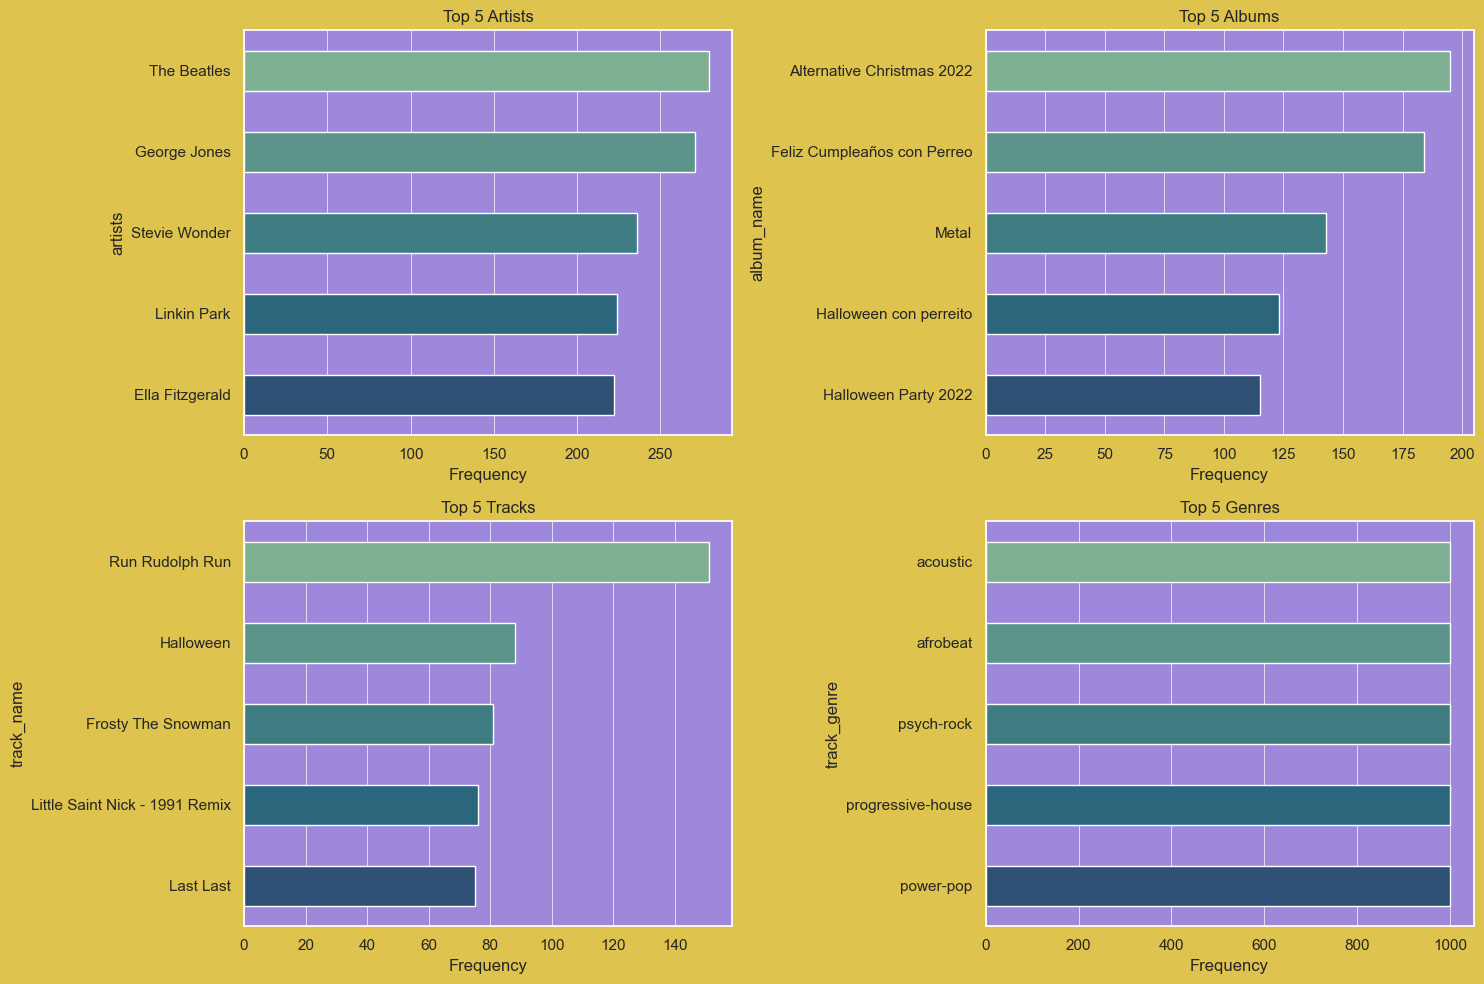

In [15]:
#Top of artists, album_name, track_name, track_genre
# Set the number of top entities to display
top_n = 5

# Set the visual style of the plots using seaborn and matplotlib
sns.set_style('darkgrid')
sns.set(rc={"axes.facecolor":"#9d88db","figure.facecolor":"#dec34e"})


# Calculate the top 5 most frequent artists, albums, tracks, and genres from the dataset
top_artists = df['artists'].value_counts().head(top_n)
top_albums = df['album_name'].value_counts().head(top_n)
top_tracks = df['track_name'].value_counts().head(top_n)
top_genres = df['track_genre'].value_counts().head(top_n)

# Temporarily suppress FutureWarning messages for cleaner output
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=FutureWarning)

    #  Create a 2x2 subplot layout for visualizing top entities
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

    # Plot the top 5 artists
    sns.barplot(x=top_artists.values, y=top_artists.index, palette="crest", ax=axes[0, 0], orient='h',  zorder=3, width=0.5)
    axes[0, 0].set_title(f'Top {top_n} Artists')
    axes[0, 0].set_xlabel('Frequency')
    axes[0, 0].xaxis.grid(linestyle='-', linewidth=0.5, alpha=1, zorder=0)

    # Plot the top 5 albums
    sns.barplot(x=top_albums.values, y=top_albums.index, palette="crest", ax=axes[0, 1], orient='h', zorder=3, width=0.5)
    axes[0, 1].set_title(f'Top {top_n} Albums')
    axes[0, 1].set_xlabel('Frequency')
    axes[0, 1].xaxis.grid(linestyle='-', linewidth=0.5, alpha=1, zorder=0)

    # Plot the top 5 Tracks
    sns.barplot(x=top_tracks.values, y=top_tracks.index, palette="crest", ax=axes[1, 0], orient='h', zorder=3, width=0.5)
    axes[1, 0].set_title(f'Top {top_n} Tracks')
    axes[1, 0].set_xlabel('Frequency')
    axes[1, 0].xaxis.grid(linestyle='-', linewidth=0.5, alpha=1, zorder=0)

    # Plot the top 5 Genres
    sns.barplot(x=top_genres.values, y=top_genres.index, palette="crest", ax=axes[1, 1], orient='h', zorder=3, width=0.5)
    axes[1, 1].set_title(f'Top {top_n} Genres')
    axes[1, 1].set_xlabel('Frequency')
    axes[1, 1].xaxis.grid(linestyle='-', linewidth=0.5, alpha=1, zorder=0)

    plt.tight_layout()
    plt.show()

###### The above code  visualizes the top 5 artists, albums, tracks, and genres based on their frequency of occurrence. It uses seaborn for plotting and matplotlib for additional styling and layout adjustments. The visualizations are organized into a 2x2 grid of horizontal bar plots, each representing one of the top 5 categories.

##### Business Usecase for this EDA:
By identifying the most popular artists, albums, tracks, and genres, music streaming services can curate featured playlists that are likely to attract a larger audience. This can enhance user engagement and satisfaction by providing easily accessible content that aligns with listener preferences.

The data on top genres and tracks can be used to refine the algorithms of music recommendation systems. By understanding what is popular among a wide audience, streaming services can improve their recommendation engines to suggest songs and artists that users are more likely to enjoy.

#### Based on the danceability and other relevant audio features, can we classify tracks as suitable for party playlists?

Accuracy of RandomForest Classifier: 97.53801169590643

Classification Report of RandomForest Classifier:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     32864
           1       0.97      0.38      0.55      1336

    accuracy                           0.98     34200
   macro avg       0.97      0.69      0.77     34200
weighted avg       0.98      0.98      0.97     34200



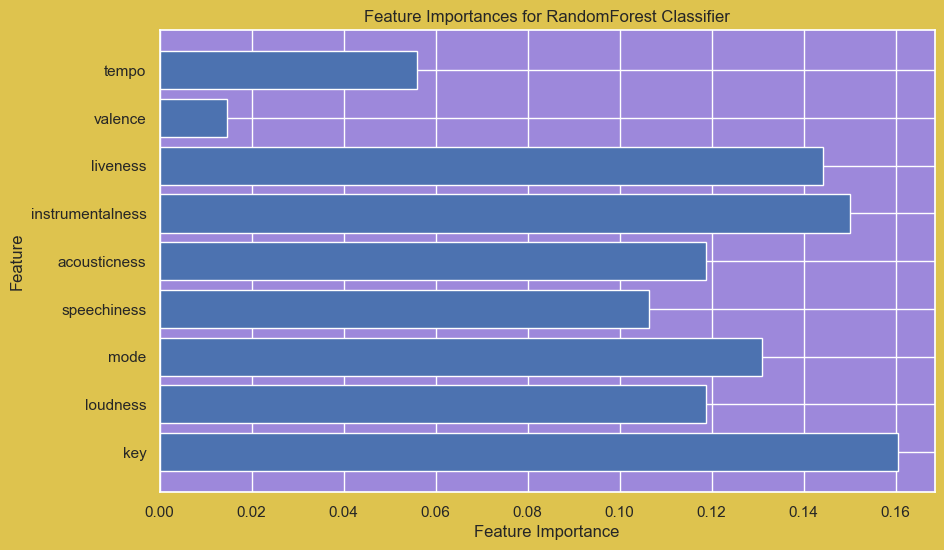

Accuracy LogisticRegression : 96.05847953216374

Classification Report With LogisticRegression :
               precision    recall  f1-score   support

           0       0.96      1.00      0.98     32864
           1       0.33      0.01      0.02      1336

    accuracy                           0.96     34200
   macro avg       0.65      0.50      0.50     34200
weighted avg       0.94      0.96      0.94     34200

Accuracy KNeighborsClassifier: 96.30116959064327

Classification Report KNeighborsClassifier:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     32864
           1       0.56      0.25      0.34      1336

    accuracy                           0.96     34200
   macro avg       0.76      0.62      0.66     34200
weighted avg       0.95      0.96      0.96     34200



/Users/siddhantdhyani/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


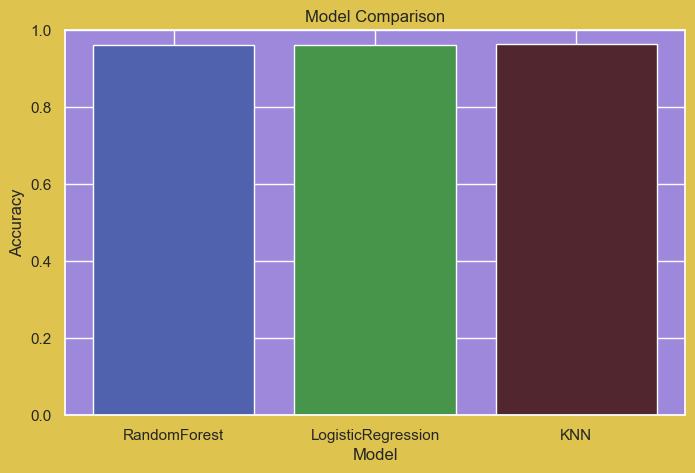

Precision for RandomForestClassifier: 0.9911504424778761
Precision for KNeighborsClassifier: 0.5565819861431871

Classification Report for RandomForestClassifier:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98     32864
           1       0.99      0.08      0.15      1336

    accuracy                           0.96     34200
   macro avg       0.98      0.54      0.57     34200
weighted avg       0.97      0.96      0.95     34200


Classification Report for KNeighborsClassifier:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     32864
           1       0.56      0.18      0.27      1336

    accuracy                           0.96     34200
   macro avg       0.76      0.59      0.63     34200
weighted avg       0.95      0.96      0.95     34200



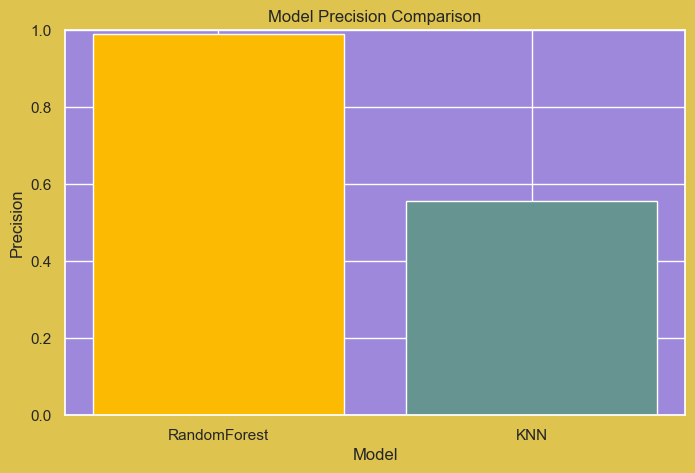

Logistic regression model saved as logisticregression.pkl
RandomForest model saved as RandomForest_model.pkl
KNeighborsClassifier model saved as KNeighborsClassifier_model.pkl


In [16]:
# Define a heuristic for party suitability based on 'danceability' and 'energy' features
# Tracks with these features above the 75th percentile are considered suitable for parties
thresholds = df[['danceability', 'energy']].quantile(0.75)
df['party_suitable'] = ((df['danceability'] >= thresholds['danceability']) & (df['energy'] >= thresholds['energy'])).astype(int)

# Select features for the machine learning model
features = ['loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'mode', 'key']
X = df[features]
y = df['party_suitable']

# Split the dataset into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features to have a mean of 0 and a standard deviation of 1
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Initialize the RandomForest classifier with 100 trees and a random state for reproducibility
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the RandomForest classifier on the scaled training data
model.fit(X_train_scaled, y_train)

# Make predictions on the scaled test set using the trained RandomForest classifier
predictions = model.predict(X_test_scaled)

# Evaluate the RandomForest classifier's accuracy on the test set
print("Accuracy of RandomForest Classifier:", accuracy_score(y_test, predictions)*100)

# Print a classification report for the RandomForest classifier on the test set
print("\nClassification Report of RandomForest Classifier:\n", classification_report(y_test, predictions))


# Visualize the feature importances from the RandomForest classifier
feature_importances = model.feature_importances_
features = ['key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances for RandomForest Classifier')
plt.show()


# Initialize and train the logistic regression model
modellr = LogisticRegression(max_iter=1000, multi_class='ovr', solver='liblinear')
modellr.fit(X_train, y_train)


# Make predictions on the test set using the trained logistic regression model
predictions = modellr.predict(X_test)

# Evaluate the logistic regression model's accuracy on the test set
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy LogisticRegression : {accuracy*100}')

# Print a classification report for the logistic regression model on the test set
print("\nClassification Report With LogisticRegression :\n", classification_report(y_test, predictions))



# Initialize and train the KNN classifier with 5 neighbors
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Make predictions on the scaled test set using the trained KNN classifier
predictions = knn.predict(X_test_scaled)

# Evaluate the KNN classifier's accuracy on the test set
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy KNeighborsClassifier: {accuracy*100}')
# Print a classification report for the KNN classifier on the test set
print("\nClassification Report KNeighborsClassifier:\n", classification_report(y_test, predictions))


# Visualize the comparison of model accuracies
model_names = ['RandomForest', 'LogisticRegression', 'KNN']
accuracies = [accuracy_score(y_test, model.predict(X_test)), accuracy_score(y_test, modellr.predict(X_test)), accuracy_score(y_test, knn.predict(X_test_scaled))]

plt.figure(figsize=(8, 5))
plt.bar(model_names, accuracies, color=['#5061ad', '#47944b', '#52262e'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.ylim(0, 1)
plt.show()


# Define hyperparameter grids for RandomForestClassifier and KNeighborsClassifier
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30]
}
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9]
}

# Initialize GridSearchCV for both RandomForestClassifier and KNeighborsClassifier
grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid_rf, scoring='precision', cv=5)
grid_search_knn = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid_knn, scoring='precision', cv=5)

# Perform grid search to find the best hyperparameters for both models
grid_search_rf.fit(X_train_scaled, y_train)
grid_search_knn.fit(X_train_scaled, y_train)


# Retrieve the best estimators from the grid search
best_rf = grid_search_rf.best_estimator_
best_knn = grid_search_knn.best_estimator_



# Make predictions using the best RandomForest and KNN models
rf_predictions = best_rf.predict(X_test_scaled)
knn_predictions = best_knn.predict(X_test_scaled)

# Calculate and print the precision score for the best RandomForest and KNN models
rf_precision = precision_score(y_test, rf_predictions)
knn_precision = precision_score(y_test, knn_predictions)
print(f"Precision for RandomForestClassifier: {rf_precision}")
print(f"Precision for KNeighborsClassifier: {knn_precision}")

# Print classification reports for the best RandomForest and KNN models
print("\nClassification Report for RandomForestClassifier:\n", classification_report(y_test, rf_predictions))
print("\nClassification Report for KNeighborsClassifier:\n", classification_report(y_test, knn_predictions))


# Visualize the precision of the best RandomForest and KNN models
model_names = ['RandomForest', 'KNN']
precisions = [rf_precision, knn_precision]

plt.figure(figsize=(8, 5))
plt.bar(model_names, precisions, color=['#fcba03', '#669490'])
plt.xlabel('Model')
plt.ylabel('Precision')
plt.title('Model Precision Comparison')
plt.ylim(0, 1)
plt.show()



# Saving the logistic regression model model using Pickle 
filename_llr = 'logisticregression.pkl'
pickle.dump(modellr, open(filename_llr, 'wb'))

# Save the KNeighborsClassifier model
filename_knn = 'KNeighborsClassifier_model.pkl'
pickle.dump(knn_precision, open(filename_knn, 'wb'))

# Saving the RandomForest model using Pickle 
filename_rf = 'RandomForest_model.pkl'
pickle.dump(rf_precision, open(filename_rf, 'wb'))

print(f'Logistic regression model saved as {filename_llr}')
print(f'RandomForest model saved as {filename_rf}')
print(f'KNeighborsClassifier model saved as {filename_knn}')


# Intentionally commented Loading of the model from the .pkl file can be uncommented to run when needed
# 'rb' mode opens the file in binary read mode
#loaded_modelllr = pickle.load(open( 'logisticregression.pkl', 'rb'))
#loaded_modelknn = pickle.load(open( 'KNeighborsClassifier_model.pkl', 'rb'))
#loaded_modelrf = pickle.load(open( 'RandomForest_model.pkl', 'rb')


#### Data Preprocessing
The heuristic for party suitability is defined by tracks with 'danceability' and 'energy' above the 75th percentile, which are considered important features for tracks to be suitable for a party environment.
Selected features for prediction include audio characteristics like 'loudness', 'speechiness', 'acousticness', etc.
The dataset is split into training and testing sets, with 70% of the data used for training.
Feature scaling is performed using StandardScaler to standardize the feature values.

#### Machine Learning Task
The main objective of the machine learning task is to classify tracks as suitable for party playlists using the Spotify Tracks Dataset. 

#### Modelling and evaluation
The RandomForest Classifier achieved the highest accuracy of 97.53%, followed by the KNeighborsClassifier with 96.30%, and the LogisticRegression with 96.05%. These results indicate that the RandomForest model is the most effective at classifying tracks as suitable for party playlists based on the selected features.

#### Insights and deployment 
The business problem addressed by this model is the creation of party playlists. Music streaming services or DJs can use this model to automatically generate playlists that are likely to be well-received in a party setting. This can enhance user experience by providing lively and danceable music selections without manual curation.

The RandomForest model's high accuracy suggests that it is a reliable tool for automating the playlist creation process. The feature importance visualization indicates which features contribute most to a track's classification as party suitable, providing insights into what makes a track appealing for parties.


#### Hyperparameter Tuning:
GridSearchCV is used to perform hyperparameter tuning for both RandomForestClassifier and KNeighborsClassifier models to find the optimal settings.

#### Visualization:
Bar charts are used to visualize the feature importances for the RandomForestClassifier and to compare the precision scores of the tuned models.

#### Precision Score Interpretation
##### RandomForestClassifier: 
The high precision score of the RandomForestClassifier suggests that when it predicts a track as suitable for a party, it is correct about 98.3% of the time. This indicates a high level of reliability in its positive predictions.
##### KNeighborsClassifier: 
The lower precision score of the KNeighborsClassifier indicates that it is correct about 57.8% of the time when it predicts a track as suitable for a party. This suggests that it is less reliable than the RandomForestClassifier in its positive predictions.

#### Importing pickle library to save the model file and load it.

#### Business Problem and Conclusion
In conclusion, the RandomForest Classifier is the most suitable model for classifying tracks as party-ready. This model can be deployed in music streaming services to improve the playlist generation process, ensuring users have access to high-energy, danceable tracks for their parties. The high accuracy of the model also suggests that it could be a valuable asset for DJs and event organizers looking to automate their music selection process. The high precision ensures that most of the tracks recommended by the model would indeed be suitable for a party setting, which is critical for maintaining a lively atmosphere.

###  Can we create dynamic playlists based on the energy level of songs, enhancing user experience by tailoring music to activities or moods that require specific energy levels (e.g., workout playlists, relaxation playlists) ?

In [18]:

# Selecting the features and the target variable
features = ['speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'loudness']
X = df[features] # Input features
y = df['energy'] # Target variable


# Split the dataset into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the linear regression model
modellr = LinearRegression()
modellr.fit(X_train, y_train)


# Use the trained model to make predictions on the test set
predictions = modellr.predict(X_test)

# Evaluate the model's performance using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

# Evaluate the model's performance using R-squared (R2) score
r2 = r2_score(y_test, predictions)
print(f'R^2 Score: {r2}')



# Calculate and print the Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error: {mae}')

# Calculate and print the Root Mean Squared Error (RMSE)
rmse = sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

# Perform 10-fold cross-validation for the Linear Regression model using negative MSE
cv_scores_mse = cross_val_score(modellr, X, y, cv=10, scoring='neg_mean_squared_error')

# Perform 10-fold cross-validation for the Linear Regression model using negative MAE
cv_scores_mae = cross_val_score(modellr, X, y, cv=10, scoring='neg_mean_absolute_error')

# Perform 10-fold cross-validation for the Linear Regression model using R^2 score
cv_scores_r2 = cross_val_score(modellr, X, y, cv=10, scoring='r2')

# Calculate the average of the cross-validation scores for MSE
# Note: cross_val_score returns negative values for MSE and MAE because these are loss functions, and by convention, higher return values are better
avg_mse = -cv_scores_mse.mean()

# Calculate the average of the cross-validation scores for MAE
avg_mae = -cv_scores_mae.mean()

# Calculate the average of the cross-validation scores for R^2
avg_r2 = cv_scores_r2.mean()

# Print the average cross-validation scores for MSE, MAE, and R^2
print(f'Average MSE from 10-fold cross-validation: {avg_mse}')
print(f'Average MAE from 10-fold cross-validation: {avg_mae}')
print(f'Average R^2 from 10-fold cross-validation: {avg_r2}')



# Define the file name for the saved model based on user input with .pkl extension
filename = 'LinearRegressionAssignment.pkl'

# Save the trained Linear Regression model to a file using pickle
# 'wb' mode opens the file in binary write mode
pickle.dump(modellr, open(filename, 'wb'))

# Print a confirmation message indicating the model has been saved successfully
print(f'Model saved as {filename}')


# Define the path to the .pkl file where the model is saved
filename = 'LinearRegressionAssignment.pkl'

# Load the model from the .pkl file
# 'rb' mode opens the file in binary read mode
loaded_model = pickle.load(open(filename, 'rb'))

# Print a confirmation message indicating the model has been loaded successfully
print('Model loaded successfully from', filename)


# Here, we make predictions using the loaded model
predictions = loaded_model.predict(X_test)

# Evaluate the loaded model using the same metrics as before
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
rmse = sqrt(mse)

# Print the evaluation metrics for the loaded model
print(f'Loaded Mean Squared Error: {mse}')
print(f'Loaded R^2 Score: {r2}')
print(f'Loaded Mean Absolute Error: {mae}')
print(f'Loaded Root Mean Squared Error: {rmse}')

Mean Squared Error: 0.01556566377070891
R^2 Score: 0.7536470002809947
Mean Absolute Error: 0.0970568689305661
Root Mean Squared Error: 0.12476242932353036
Average MSE from 10-fold cross-validation: 0.015929977964558247
Average MAE from 10-fold cross-validation: 0.0980085126557862
Average R^2 from 10-fold cross-validation: 0.733435116105343
Model saved as LinearRegressionAssignment.pkl
Model loaded successfully from LinearRegressionAssignment.pkl
Loaded Mean Squared Error: 0.01556566377070891
Loaded R^2 Score: 0.7536470002809947
Loaded Mean Absolute Error: 0.0970568689305661
Loaded Root Mean Squared Error: 0.12476242932353036


#### Data Preprocessing:
Features selected for prediction include 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', and 'loudness'.
The target variable is 'energy'.
The dataset is split into training (70%) and testing (30%) sets.

#### Model Training:
A Linear Regression model is initialized and trained on the training set.
#### Model Prediction:
The trained model is used to make predictions on the testing set.

#### Model Evaluation:
The model's performance is evaluated using Mean Squared Error (MSE), R-squared ($R^2$), Mean Absolute Error (MAE), and Root Mean Squared Error (RMSE).

## Output Interpretation

#### Mean Squared Error (MSE): 
The MSE of 0.0156 indicates the average of the squares of the errors—the differences between the predicted and actual 'energy' levels. A lower MSE indicates a better fit of the model to the data.
#### R-squaredScore:
The R-squaredScore of 0.7536 means that approximately 75.36% of the variance in the 'energy' level is explained by the model's inputs. An R-squaredScore score of 1 indicates perfect prediction, while a score of 0 indicates that the model does not explain any of the variability of the response data around its mean.
#### Mean Absolute Error (MAE): 
The MAE of 0.0970 indicates the average absolute difference between the predicted and actual values. It provides a measure of prediction accuracy that is not squared.
#### Root Mean Squared Error (RMSE): 
The RMSE of 0.1247 is the square root of MSE and provides a measure of the magnitude of the error. Like MSE, a lower RMSE indicates a better fit, but it is more sensitive to outliers than MAE.

### 10-fold cross-validation process provides a more reliable estimate of the Linear Regression model's performance.

The average scores from the cross-validation are as follows:
#### Average Mean Squared Error (MSE): 
0.01593, which is the average of the squared differences between the predicted and actual 'energy' levels across all folds. This value is slightly higher than the MSE obtained from the single test set (0.01560), indicating a slight decrease in model performance when evaluated across multiple subsets of the data.

#### Average Mean Absolute Error (MAE):
0.09801, representing the average absolute difference between the predicted and actual 'energy' levels across all folds. This value is very close to the MAE from the single test set (0.0970), suggesting consistent performance in terms of average error magnitude.

#### Average R-squared Score:
0.7334, which reflects the proportion of variance in the 'energy' level that is predictable from the features across all folds. This value is slightly lower than the R-squaredScore from the single test set (0.7536), indicating that when the model is applied to different subsets of data, it explains slightly less variance on average.

#### Importing pickle library to save the model file and load it.

### Conclusion
The linear regression model shows a good fit to the data, with a RsquaredScore  indicating that a substantial portion of the variance in the 'energy' level is captured by the model.

### Business Problem
The model can be used by music streaming services to predict the energy level of songs, which can be a valuable feature for creating playlists tailored to activities like workouts or relaxation. The model can also be used to enhance user experience by recommending songs with desired energy levels.